<a href="https://colab.research.google.com/github/salwaa-hub/jbp12_machinelearning/blob/main/jbp12_machinelearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WORKSHEET LSTM** (Salwa Salsabila Daffa'atulhaq - 4.33.23.2.25)

Import dan Generate Data Sintetik (cosinus/spiral)

In [64]:
# 1. Import dan generate data cosinus
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from IPython.display import display
import time

def generate_cosine_data(seq_length=50, num_samples=1000):
    X, y = [], []
    for _ in range(num_samples):
        start = np.random.rand() * 2 * np.pi
        xs = np.array([np.cos(start + i * 0.1) for i in range(seq_length + 1)])
        X.append(xs[:-1])
        y.append(xs[-1])
    X = np.array(X).reshape((num_samples, seq_length, 1))
    y = np.array(y)
    return X, y

X, y = generate_cosine_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fungsi Build Model LSTM Dinamis

In [65]:
# 2. Build model LSTM fleksibel
def build_lstm_model(units, num_layers, dropout_rate, optimizer, timesteps, features):
    model = Sequential()
    model.add(Input(shape=(timesteps, features)))  # Gunakan Input layer eksplisit

    for i in range(num_layers):
        return_seq = i < num_layers - 1
        model.add(LSTM(units, return_sequences=return_seq))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1))  # Output layer
    model.compile(loss='mse', optimizer=optimizer)
    return model
    if optimizer == 'adam':
        opt = Adam()
    elif optimizer == 'rmsprop':
        opt = RMSprop()
    elif optimizer == 'sgd':
        opt = SGD(momentum=0.9)
    else:
        opt = Adam()

    model.compile(optimizer=opt, loss='mse')
    return model

Fungsi untuk Melatih Model

In [66]:
def train_and_evaluate(X_train, y_train, X_test, y_test, config):
    print(f"🔧 Melatih dengan config: {config}")

    timesteps = X_train.shape[1]
    features = X_train.shape[2]

    model = build_lstm_model(
        units=config['units'],
        num_layers=config['layers'],
        dropout_rate=config['dropout'],
        optimizer=config['optimizer'],
        timesteps=timesteps,
        features=features
    )

    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=config['epochs'],
        batch_size=config['batch_size'],
        verbose=0
    )
    elapsed = time.time() - start_time

    val_loss = history.history['val_loss'][-1]
    print(f"✅ Validation Loss Akhir: {val_loss:.6f}")

    # 🖼️ Plot grafik training loss dan val loss
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f"Loss Curve - {config['optimizer']}, {config['units']} Units, {config['layers']} Layers")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return history, val_loss, elapsed

Fungsi untuk Menjalankan Semua Eksperimen

In [67]:
# 4. Jalankan semua eksperimen
def run_experiments(X_train, y_train, X_test, y_test):
    configs = [
        {'units': 50, 'layers': 1, 'dropout': 0.2, 'optimizer': 'adam', 'batch_size': 32, 'epochs': 10},
        {'units': 100, 'layers': 2, 'dropout': 0.3, 'optimizer': 'rmsprop', 'batch_size': 64, 'epochs': 10},
        {'units': 50, 'layers': 1, 'dropout': 0.2, 'optimizer': 'sgd', 'batch_size': 32, 'epochs': 10},
        {'units': 75, 'layers': 2, 'dropout': 0.5, 'optimizer': 'adam', 'batch_size': 16, 'epochs': 10},
        {'units': 100, 'layers': 3, 'dropout': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32, 'epochs': 10},
    ]

    results = []
    histories = []

    for config in configs:
        history, val_loss, elapsed = train_and_evaluate(X_train, y_train, X_test, y_test, config)
        config_result = config.copy()
        config_result.update({'val_loss': val_loss, 'elapsed_time': elapsed})
        results.append(config_result)
        histories.append(history)

    df_results = pd.DataFrame(results)
    return histories, df_results

Fungsi Evaluasi: Tampilkan Tabel & Simpan CSV

In [68]:
# 5. Evaluasi hasil eksperimen
def display_results_table(df):
    sorted_df = df.sort_values(by='val_loss')
    display(sorted_df)

def export_results_to_csv(df, filename="hasil_lstm_eksperimen.csv"):
    df.to_csv(filename, index=False)
    print(f"Hasil eksperimen disimpan ke: {filename}")

def plot_performance(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='elapsed_time', y='val_loss', hue='optimizer', style='layers', s=100)
    plt.title("Trade-off: Waktu Pelatihan vs Validation Loss")
    plt.xlabel("Waktu Pelatihan (detik)")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

Fungsi Visualisasi Trade-off Performa vs Waktu

In [69]:
def plot_performance(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='elapsed_time', y='val_loss', hue='optimizer', style='layers', s=100)
    plt.title("Trade-off: Waktu Pelatihan vs Validation Loss")
    plt.xlabel("Waktu Pelatihan (detik)")
    plt.ylabel("Validation Loss")
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


Eksekusi Semua Langkah

🔧 Melatih dengan config: {'units': 50, 'layers': 1, 'dropout': 0.2, 'optimizer': 'adam', 'batch_size': 32, 'epochs': 10}
✅ Validation Loss Akhir: 0.000280


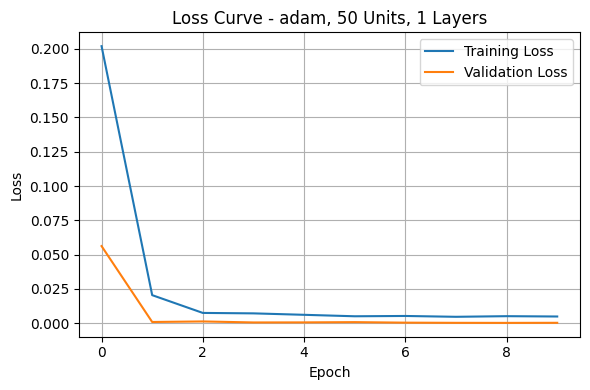

🔧 Melatih dengan config: {'units': 100, 'layers': 2, 'dropout': 0.3, 'optimizer': 'rmsprop', 'batch_size': 64, 'epochs': 10}
✅ Validation Loss Akhir: 0.017832


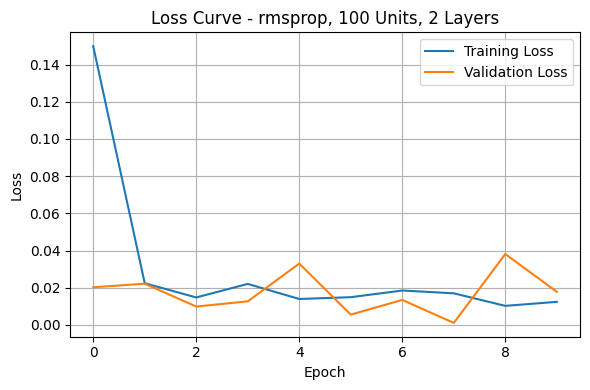

🔧 Melatih dengan config: {'units': 50, 'layers': 1, 'dropout': 0.2, 'optimizer': 'sgd', 'batch_size': 32, 'epochs': 10}
✅ Validation Loss Akhir: 0.005279


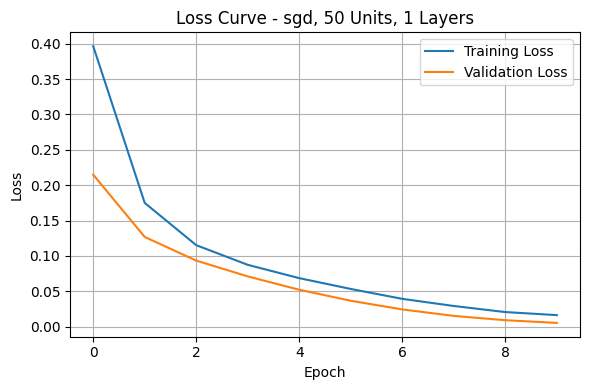

🔧 Melatih dengan config: {'units': 75, 'layers': 2, 'dropout': 0.5, 'optimizer': 'adam', 'batch_size': 16, 'epochs': 10}
✅ Validation Loss Akhir: 0.000601


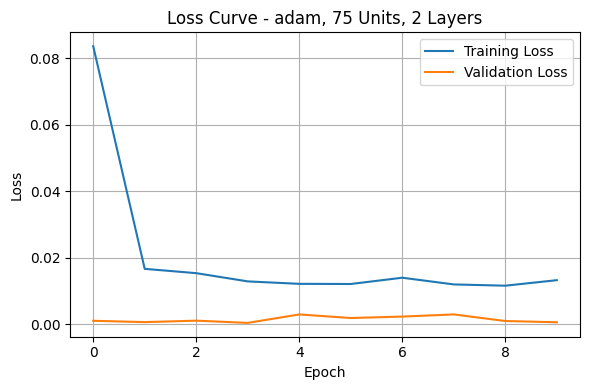

🔧 Melatih dengan config: {'units': 100, 'layers': 3, 'dropout': 0.3, 'optimizer': 'rmsprop', 'batch_size': 32, 'epochs': 10}
✅ Validation Loss Akhir: 0.017062


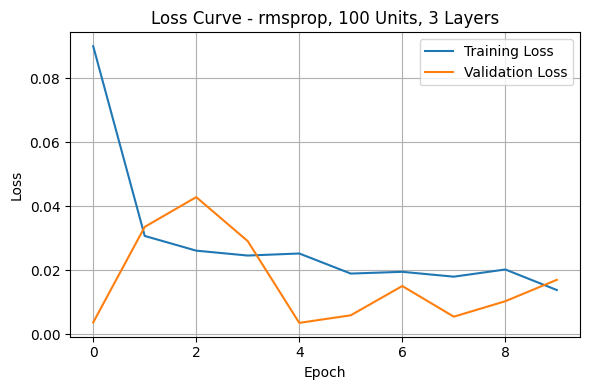

,units,layers,dropout,optimizer,batch_size,epochs,val_loss,elapsed_time
0,50,1,0.2,adam,32,10,0.000280,7.948134
3,75,2,0.5,adam,16,10,0.000601,25.866225
2,50,1,0.2,sgd,32,10,0.005279,7.066556
4,100,3,0.3,rmsprop,32,10,0.017062,34.581174
1,100,2,0.3,rmsprop,64,10,0.017832,23.435897


Hasil eksperimen disimpan ke: hasil_lstm_eksperimen.csv


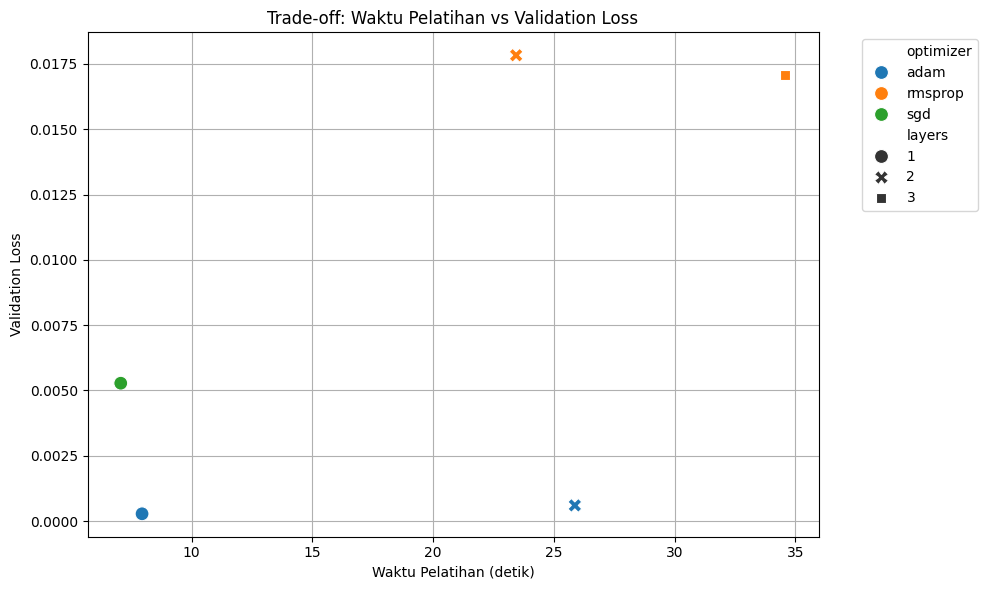

In [70]:
# 6. Eksekusi dan tampilkan hasil
histories, df_results = run_experiments(X_train, y_train, X_test, y_test)
display_results_table(df_results)
export_results_to_csv(df_results)
plot_performance(df_results)